## Marketing mix modeling in Python

<img src="https://i.ibb.co/PrDVkyq/banner-marketing.png" alt="banner-marketing" border="0">

### 💾 Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import datetime as dt

### 💽 Carga de datos

- A continuación se decriben las variables contenidas en el dataset.
- El dataset se consiguió por medio de el laburo de un miembro del equipo, sin comprometer la información de la emrpesa.

| **VARIABLE** |                **DESCRIPCIÓN**                      |
| ---:         | :---                                                | 
| Date         | Fecha en la que se realizó la inversión             |
| OpenTV       | Presupuesto de promoción televisiva abierta.        |
| PayTV        | Presupuesto de promoción televisiva de paga.        |
| Radio        | Presupuesto de promoción radiofónica                |
| Print        | Presupuesto de promoción en impresiones             |
| Facebook     | Presupuesto de promoción en Facebook                |
| Google       | Presupuesto de promoción en Google                  |
| Email        | Presupuesto de promoción en correos publicitarios   |
| Sales        | Ventas obtenidas                                    |

In [2]:
data = pd.read_csv('data/mmm.csv')

In [3]:
data.sample(5)

,Date,OpenTV,PayTV,Radio,Print,Facebook,Google,Email,Sales
118,4/12/2020,15692.36022,0.00000,9273.745816,2037.212843,4263.099627,9270.591896,4461.708696,144472.2
96,11/10/2019,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1010.904894,80185.6
169,4/4/2021,0.00000,16677.10789,10839.386410,0.000000,4164.390309,6391.030591,3365.503286,135432.1
75,6/16/2019,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,65638.5
168,3/28/2021,15168.61005,0.00000,8822.850446,2505.880692,0.000000,9438.045438,5345.957802,149580.5


### 🧰 Formatos

- Renombramos las columnas del dataframe para un mejor entendimiento de las variables.

In [4]:
data.columns = ['fecha','tv_abierta','tv_paga','radio','impresiones','facebook','google','correo','ventas']

- Nos apoyamos de la función .info() para verificar los tipos de datos de cada variable, además de su conteo por cada feature.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        200 non-null    object 
 1   tv_abierta   200 non-null    float64
 2   tv_paga      200 non-null    float64
 3   radio        200 non-null    float64
 4   impresiones  200 non-null    float64
 5   facebook     200 non-null    float64
 6   google       200 non-null    float64
 7   correo       200 non-null    float64
 8   ventas       200 non-null    float64
dtypes: float64(8), object(1)
memory usage: 14.2+ KB


- Corregimos el formato de la fecha:

In [6]:
data['fecha'] = pd.to_datetime(data['fecha'])

### Missing values

- Creamos la función miss_values() que retorna el porcentaje de missing values por cada columna del dataframe:

In [7]:
def miss_values(df):
    return (df.isnull().sum()) / (len(df.index)) * 100

In [8]:
miss_values(data)

fecha          0.0
tv_abierta     0.0
tv_paga        0.0
radio          0.0
impresiones    0.0
facebook       0.0
google         0.0
correo         0.0
ventas         0.0
dtype: float64

### Duplicated values

- Verificamos la duplicidad de datos:

In [9]:
data.duplicated().sum()

0

## <p style="background: linear-gradient(to right,#ef476f,#ffd166, #06d6a0); color:white; font-size:140%; text-align:Center; border-radius: 20px 20px; margin: 0px 0px 0px 0px">  📊 EDA  </p>

- Primero, creamos una paleta de colores para utilizar en los gráficos próximos.

In [10]:
palette = ['#93F03B','#FFA32F','#FFEC21','#F13C59','#378AFF','#BE61CA','#AADEA7']

- Se hace un unpivot de los datos para que tengan un formato más fácil de procesar con las librerias de visualización.

In [11]:
data_melt = data.melt(id_vars=['fecha'], var_name='canal',value_vars=data.columns[1:8],value_name='inversion')

- La siguiente función muestra la distribución de la categoría que recibe como parámetro:

In [12]:
def show_dist(title_cat,cat,color):
    sns.set_palette([color])

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)

    sns.histplot(data[data[cat]!=0][cat], bins=20)
    ax.set_title(f'Diagrama de caja para {title_cat}',fontweight="bold")
    ax.set_xlabel('Inversión en dólares')
    ax.set_ylabel('Frecuencia relativa')
    plt.show()

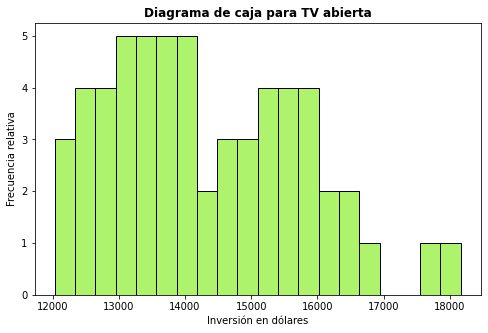

In [13]:
show_dist('TV abierta','tv_abierta','#93F03B')

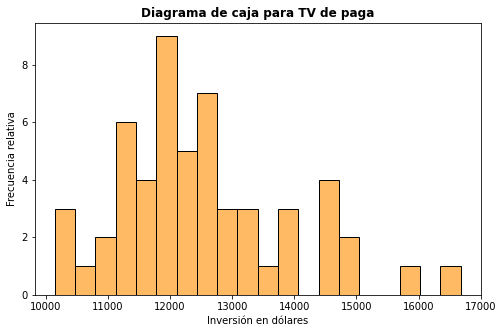

In [14]:
show_dist('TV de paga','tv_paga','#FFA32F')

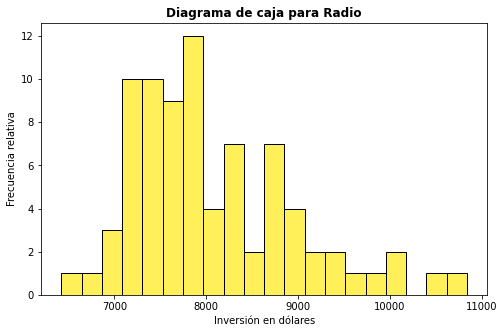

In [15]:
show_dist('Radio','radio','#FFEC21')

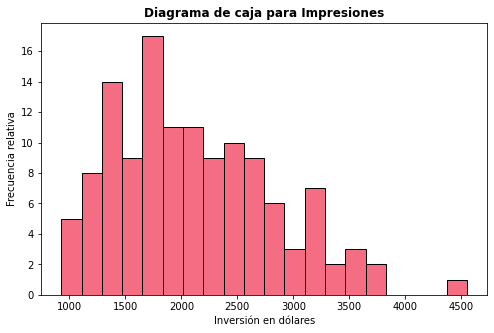

In [16]:
show_dist('Impresiones','impresiones','#F13C59')

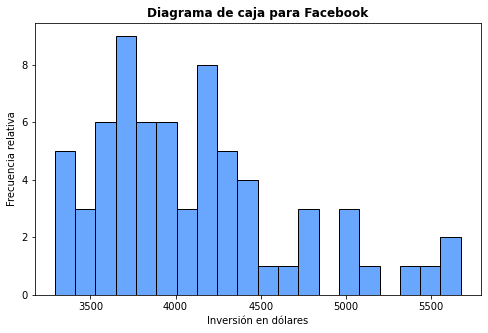

In [17]:
show_dist('Facebook','facebook','#378AFF')

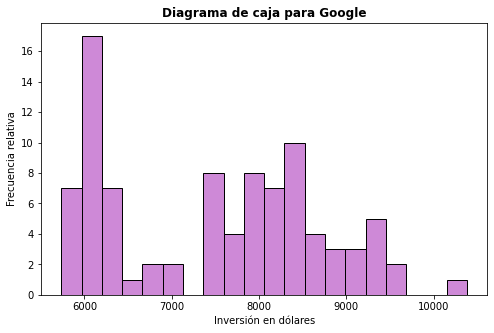

In [18]:
show_dist('Google','google','#BE61CA')

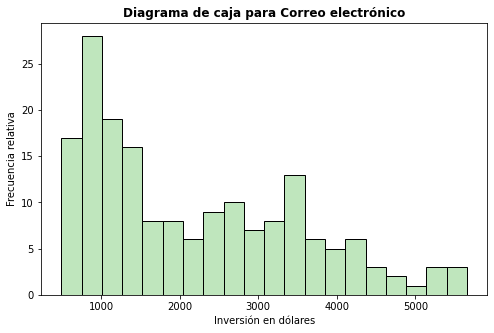

In [19]:
show_dist('Correo electrónico','correo','#AADEA7')

- La mayoria de canales de inversión presentan sesgo positivo, lo que se puede explicar con las fechas de inversión.
- El comportamiento sesdago de las inversiones se debe a que la mayor parte del tiempo se mantienen activos lo canales con inversiones no tan altas, pero cuando se participa en una campaña publicitaria estas inversiones crecen significativamente.

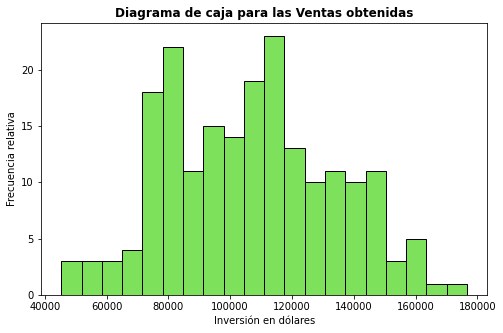

In [20]:
show_dist('las Ventas obtenidas','ventas','#52D726')

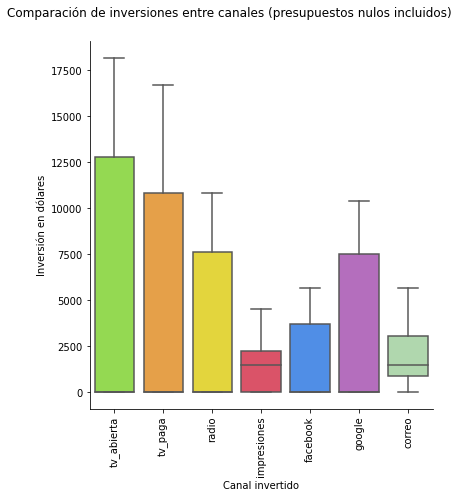

In [21]:
sns.set_palette(palette)

g = sns.catplot(x='canal',y='inversion',data=data_melt, kind='box')
g.fig.suptitle('Comparación de inversiones entre canales (presupuestos nulos incluidos)', y=1.05, ha='center')
g.fig.set_size_inches(6,6)
g.set(xlabel='Canal invertido', ylabel='Inversión en dólares')
plt.xticks(rotation=90)
plt.show()

- Los estadísticos no se pueden apreciar correctamente por la presencia de los presupuestos con valor de 0 (presupuestos nulos).

In [22]:
data.describe()

,tv_abierta,tv_paga,radio,impresiones,facebook,google,correo,ventas
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4154.276494,3440.496211,3232.233894,1346.299509,1398.720108,3418.953571,1942.386141,106681.415000
std,6562.186586,5647.247953,4008.912178,1171.510851,1982.006811,3838.856199,1434.872629,27007.066833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45323.300000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,873.803713,83969.425000
50%,0.000000,0.000000,0.000000,1465.924196,0.000000,0.000000,1467.965657,108531.050000
75%,12767.162365,10859.182242,7653.583739,2232.334556,3710.924637,7534.931806,3082.808291,125669.950000
max,18164.390870,16677.107890,10839.386410,4551.527451,5674.410000,10383.942040,5658.230414,176683.400000


In [23]:
data_no_0 = data_melt.loc[data_melt['inversion']>0]

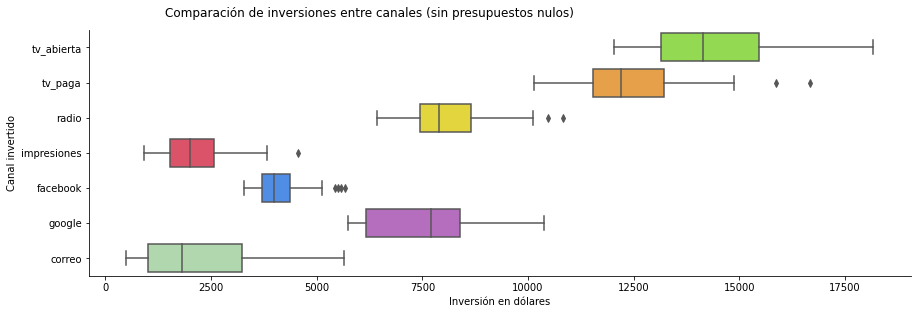

In [24]:
sns.set_palette(palette)

g = sns.catplot(x='inversion',y='canal',data=data_no_0, kind='box')
g.fig.suptitle('Comparación de inversiones entre canales (sin presupuestos nulos)', y=1.05, ha='center')
g.fig.set_size_inches(16,4)
g.set(ylabel='Canal invertido', xlabel='Inversión en dólares')
plt.show()

- Se econtraron **valores atípicos** para algunos de los canales en su rango intercuartílico de presupuestos **distintos a cero**.
- Estos valores atípicos son apreciables en las distribuciones ya visualizadas.
- Se va a seguir haciendo la exploración de datos con estos atípicos, pero **se retirarán del conjunto de datos en caso de requerir un modelo predictivo**.

In [25]:
data_no_fechas = data.drop('fecha',axis=1)

In [26]:
relations = data_no_fechas.corr()

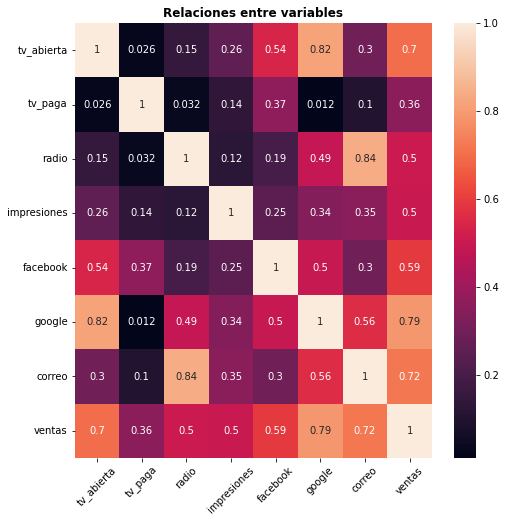

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

sns.heatmap(relations, annot=True, ax=ax)
ax.set_title('Relaciones entre variables',fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- Solamente existe un canal de inversión que **no se encuentra relacionado significativamente** a las ventas y es el de **TV de paga**.
- El canal de TV de paga **debe entrar al modelo de saturación** para hacer el análisis respectivo.
- El canal de TV de paga **no debe estar en modelo predictivo**, pues no presenta una relación representativa con la variable objetivo (ventas).

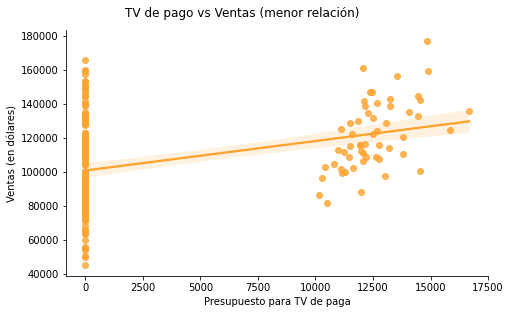

In [28]:
sns.set_palette(palette[1:2])

g = sns.lmplot(x='tv_paga',y='ventas', data=data)
g.fig.suptitle('TV de pago vs Ventas (menor relación)', y=1.05, ha='center')
g.fig.set_size_inches(8,4)
g.set(xlabel='Presupuesto para TV de paga', ylabel='Ventas (en dólares)')
plt.show()

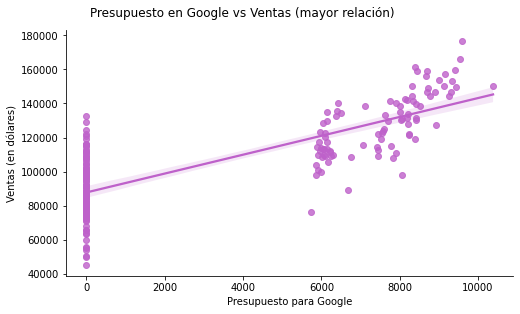

In [29]:
sns.set_palette(palette[5:6])

g = sns.lmplot(x='google',y='ventas', data=data)
g.fig.suptitle('Presupuesto en Google vs Ventas (mayor relación)', y=1.05, ha='center')
g.fig.set_size_inches(8,4)
g.set(xlabel='Presupuesto para Google', ylabel='Ventas (en dólares)')
plt.show()

- El canal de inversión de **TV de paga** presenta **mayor dispersión** a la del canal de Google (se diferencian entre si en 5% respecto a la media de las ventas).
- Pese a que **ambos canales** de inversión tienen una **desviación de 15% a 20% de la media de ventas**, la relación entre las inversiones destinadas a TV de paga y las ventas generadas no es tan fuerte como con el canal de inversión de Google.

In [30]:
data.columns

Index(['fecha', 'tv_abierta', 'tv_paga', 'radio', 'impresiones', 'facebook',
       'google', 'correo', 'ventas'],
      dtype='object')

In [31]:
x_ = data[['tv_abierta','tv_paga','radio','impresiones','facebook','google','correo']]
y_ = data[['ventas']]

In [32]:
import statsmodels.api as sm

statistical_model = sm.OLS(y_, x_)

In [33]:
summary = statistical_model.fit()

In [34]:
print( summary.summary() )

                                 OLS Regression Results                                
Dep. Variable:                 ventas   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              204.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    1.01e-85
Time:                        17:01:37   Log-Likelihood:                         -2392.4
No. Observations:                 200   AIC:                                      4799.
Df Residuals:                     193   BIC:                                      4822.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Observaciones:
- Todos los canales de inversión considerados en el conjunto de datos **explican el comportamiento del 88% de las ventas** apróximadamente.
- Hay suficiente evidencia estadística para aceptar que los canales de TV abierta, facebook y google no tienen una **relación  lineal** con las ventas.

- Las **relaciones** entre los canales inversión y las ventas son **diferentes**. Algunas de ellas presentan una relación más fuerte con la ventas, pero no necesariamente se trata de una relación lineal.

## ¿Cómo son las inversiones a lo largo del año?

In [35]:
data['año'] = data['fecha'].dt.year

In [36]:
data['mes'] = data['fecha'].dt.month

In [37]:
data.columns

Index(['fecha', 'tv_abierta', 'tv_paga', 'radio', 'impresiones', 'facebook',
       'google', 'correo', 'ventas', 'año', 'mes'],
      dtype='object')

In [38]:
dict_months = { 
    1:'Enero',
    2:'Febrero',
    3:'Marzo',
    4:'Abril',
    5:'Mayo',
    6:'Junio',
    7:'Julio',
    8:'Agosto',
    9:'Septiembre',
    10:'Octubre',
    11:'Noviembre',
    12:'Diciembre'
}

In [39]:
data_names_dates = data.replace({'mes':dict_months})

In [40]:
data_names_dates.sample(3)

,fecha,tv_abierta,tv_paga,radio,impresiones,facebook,google,correo,ventas,año,mes
54,2019-01-20,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,838.208147,85354.9,2019,Enero
18,2018-05-13,14869.70421,12103.71445,0.000000,2236.994923,0.000000,8344.402337,1118.497461,141583.2,2018,Mayo
48,2018-12-09,0.00000,0.00000,8383.112139,3202.437423,3350.036795,6052.552099,3442.324316,113124.8,2018,Diciembre


In [41]:
data_melt_named = data_names_dates.melt(id_vars=['fecha','año','mes'], var_name='canal',value_vars=data.columns[1:8],value_name='inversion')

In [42]:
data_melt_named_grouped = data_melt_named.groupby(by=['año','mes'])['inversion'].sum().reset_index()

In [43]:
multi_select = alt.selection_multi(fields=['año'], bind='legend')

In [44]:
alt.Chart(data_melt_named_grouped).mark_line(point = True).encode(
    x = alt.X("mes:O", title="", sort=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']),
    y = alt.Y("inversion:Q", title='Inversiones en Dólares'),
    tooltip=[alt.Tooltip('inversion',title='Inversión',format='~s')],
    color=alt.Color('año:N', scale=alt.Scale(scheme='dark2')),
    opacity=alt.condition(multi_select, alt.value(1), alt.value(0.1))
).add_selection(
    multi_select
).properties(
    title="Inversiones totales por Año",
    width=800,
    height=200,
)

alt.Chart(...)

- No se identifica un mes en particular con un compartamiento de inversión diferenciado a los otros meses.

## ¿Cómo están compuestas las inversiones por año?

In [45]:
def composition_year(year, title):
    
    df = data_melt_named.loc[data_melt_named['año']==year, :]
    
    df = df.groupby(by=['canal']).agg({'inversion':'sum'}).reset_index()
    
    chart = alt.Chart(df).transform_joinaggregate(
        TotalInvestment='sum(inversion)',
    ).transform_calculate(
        PercentOfTotal="datum.inversion / datum.TotalInvestment"
    ).mark_arc(innerRadius=20, stroke="#fff").encode(
        theta=alt.Theta("PercentOfTotal:Q", stack=True),
        radius=alt.Radius("PercentOfTotal:Q",scale=alt.Scale(type="sqrt", zero=True, rangeMin=10, scheme='dark2')),
        tooltip=[alt.Tooltip('PercentOfTotal:Q',title='Proporción:',format='.2f'),
                 alt.Tooltip('inversion:Q',title='Inversión:',format='~s')],
        color="canal:N",
    ).properties(
        title=f"{title}",
        width=250,
        height=250
    ).configure_view(
    strokeWidth=0
    )
    return chart

In [46]:
composition_year(2018, 'Proporciones de inversión para el 2018')

alt.Chart(...)

In [47]:
composition_year(2019, 'Proporciones de inversión para el 2019')

alt.Chart(...)

In [48]:
composition_year(2020, 'Proporciones de inversión para el 2020')

alt.Chart(...)

In [49]:
composition_year(2021, 'Proporciones de inversión para el 2021')

alt.Chart(...)

Observaciones:
- Las inversiones en TV abierta por año siempre son las que cuentan con mayor presupuesto.
- Las inversiones en campañas en facebook han ido decreciendo con respecto a las otras desde el 2019 hasta el 2021.
- Pese a que las inversiones en TV de paga y las ventas no estén fuertemente relacionadas, es una de las categorias de las que cuentan con más inversión anual.

In [50]:
data_melt_cats = data_melt_named.groupby(by=['año','canal']).agg({'inversion':'sum'}).reset_index()

In [51]:
alt.Chart(data_melt_cats).transform_filter(
    'datum.canal==="facebook"'
).mark_area(
    line={'color':'darkred'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkred', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    x=alt.X('año:O'),
    y=alt.Y('inversion:Q'),
    tooltip=alt.Tooltip('inversion:Q',title='Inversión realizada', format='~s')
).properties(
    title="Inversiones en Facebook del 2018 al 2021",
    width=300,
    height=150,
    ).configure_view(
    strokeWidth=0
    )

alt.Chart(...)

- Las inversiones en el canal de Facebook decayeron un 52.86% con respecto a la inversión del 2018.
- La caida en las inversiones de este canal puede deberse a que la empresa ha decidido ya no seguir compitiendo en este medio para ver si las ventas obtenidas se veian afectadas o no.

### ¿La reducción paulatina del presupuesto en Facebook ha afectado a las ventas anuales?

In [52]:
data_grouped_sales = data.groupby(by=['año']).agg({'ventas':'sum'}).reset_index()

In [53]:
alt.Chart(data_grouped_sales).mark_area(
    line={'color':'darkgreen'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkgreen', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    x=alt.X('año:O'),
    y=alt.Y('ventas:Q'),
    tooltip=alt.Tooltip('ventas:Q',title='Venta obtenida', format='~s')
).properties(
    title="Ventas anuales del 2018 al 2021",
    width=300,
    height=200,
    ).configure_view(
    strokeWidth=0
    )

alt.Chart(...)

- Se comprueba que, pese a que la inversión en el canal de facebook se encuentra relacionada a las ventas de manera significativa. La reducción del presupuesto en este canal no ha representado una variación notable en las ventas anuales

## <p style="background: linear-gradient(to right,#dec9e9, #6247aa); color:white; font-size:150%; text-align:Center; border-radius: 20px 20px; margin: 0px 0px 0px 0px">  👨‍💻 Modelado  </p>

In [54]:
from scipy.signal import convolve2d
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

- Esta clase es la que hace las transformaciones para obtener las coordenadas de las curvas de saturación.
- Usa el hiper parámetro a para modelar la saturación de la curva.

In [55]:
class ExponentialSaturation (BaseEstimator, TransformerMixin):
    def __init__ (self, a = 1.):
        self.a = a
        
    def fit(self, X, y = None):
        X = check_array(X) 
        self._check_n_features(X, reset = True)
        return self
    
    def transform (self, X):
        check_is_fitted (self)
        X = check_array (X)
        self._check_n_features (X, reset = False)
        
        return (X / (X + (X.mean() * self.a)))

- Esta clase modela el arrastre en cada varaible en base a la fuerza y arrastre elegido.
- El arrastre y la fuerza pueden ser definidos por negocio. Pero, en este caso se optimizará con la librería Optuna por no contar con restricciones de negocio.

In [56]:
class ExponentialCarryover(BaseEstimator, TransformerMixin): 
    def __init__(self, strength = 0.5, length = 1):
        self.strength = strength
        self.length = length
        
    def fit(self, X, y = None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        
        return self

    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
            
        return convolution

## 👨‍🔧 Pipelines

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

- Cada canal modela su efecto de arrastre y luego procede a ser calculada su saturación:

In [58]:
adstock = ColumnTransformer([
        ('correo_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['correo']),
        ('facebook_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['facebook']),
        ('google_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['google']),
        ('impresiones_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['impresiones']),
        ('radio_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['radio']),
        ('tvabierta_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['tv_abierta']),
        ('tvpaga_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['tv_paga'])
])

- Se añade el modelo de Regresión Lineal porque es el que se usa conencionalmente después de haber realizado el análisis de saturación.
- En este caso, el objetivo no es realizar predicciones, sino, analizar las saturaciones obtenidas.

In [59]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('adstock', adstock),
    ('estimator', LinearRegression())
])

In [60]:
x = data.drop('ventas', axis=1)
y= data['ventas']

In [61]:
%%capture
model.fit(x,y)

## 📈 Optimización de hiper parámetros

In [62]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

print(cross_val_score(model, x, y, cv=TimeSeriesSplit()).mean())

0.7186041006756188


- Se optimizan los hiper parámetros de cada pipeline.
- Los símbolos "__" indican entrar en la jerarquía del transformador colocado como prefijo.

In [63]:
%%capture
tuned_model = OptunaSearchCV(
    estimator=model,
    param_distributions={
        # Correo
        'adstock__correo_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__correo_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__correo_pipe__saturation__a': UniformDistribution(0,2),
        # Facebook
        'adstock__facebook_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__facebook_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__facebook_pipe__saturation__a': UniformDistribution(0,2),
        # Google
        'adstock__google_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__google_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__google_pipe__saturation__a': UniformDistribution(0,2),
        # Impresiones
        'adstock__impresiones_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__impresiones_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__impresiones_pipe__saturation__a': UniformDistribution(0,2),
        # Radio
        'adstock__radio_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__radio_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__radio_pipe__saturation__a': UniformDistribution(0,2),
        # TV abierta
        'adstock__tvabierta_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__tvabierta_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__tvabierta_pipe__saturation__a': UniformDistribution(0,2),
        # TV de paga
        'adstock__tvpaga_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__tvpaga_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__tvpaga_pipe__saturation__a': UniformDistribution(0,2),
    },
    #n_trials=1000, (mejor redimiento)
    n_trials=10,
    cv=TimeSeriesSplit(),
    random_state=10
)

In [66]:
%%capture
tuned_model.fit(x,y)

[I 2022-04-04 17:04:33,672] A new study created in memory with name: no-name-37b6da41-fae5-4d24-8aac-c523e169841f
[I 2022-04-04 17:04:34,017] Trial 0 finished with value: -0.11587038367708997 and parameters: {'adstock__correo_pipe__carryover__strength': 0.09242664244599941, 'adstock__correo_pipe__carryover__length': 5, 'adstock__correo_pipe__saturation__a': 0.6275767572742299, 'adstock__facebook_pipe__carryover__strength': 0.23126986862002263, 'adstock__facebook_pipe__carryover__length': 1, 'adstock__facebook_pipe__saturation__a': 0.8332499941074196, 'adstock__google_pipe__carryover__strength': 0.7647446160554672, 'adstock__google_pipe__carryover__length': 5, 'adstock__google_pipe__saturation__a': 0.4841537079117917, 'adstock__impresiones_pipe__carryover__strength': 0.8069344716376637, 'adstock__impresiones_pipe__carryover__length': 6, 'adstock__impresiones_pipe__saturation__a': 0.06942069732340705, 'adstock__radio_pipe__carryover__strength': 0.21567891413066032, 'adstock__radio_pipe__

In [68]:
print(cross_val_score(tuned_model, x, y, cv = TimeSeriesSplit ()))

C:\Users\CCE\miniconda3\lib\site-packages\sklearn\base.py:82: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[I 2022-04-04 17:05:07,943] A new study created in memory with name: no-name-9dc09801-bb3e-451b-a4b7-30b36c6696cf
C:\Users\CCE\AppData\Local\Temp/ipykernel_13132/2233880114.py:15: RuntimeWarning: invalid value encountered in true_divide
  return (X / (X + (X.mean() * self.a)))
C:\Users\CCE\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CCE\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\CCE\miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrou

[0.77563738 0.81110549 0.68457049 0.86780318 0.8617127 ]


In [69]:
print(tuned_model.best_params_)

{'adstock__correo_pipe__carryover__strength': 0.07639040045823209, 'adstock__correo_pipe__carryover__length': 3, 'adstock__correo_pipe__saturation__a': 0.4224094050472629, 'adstock__facebook_pipe__carryover__strength': 0.46426977591480534, 'adstock__facebook_pipe__carryover__length': 5, 'adstock__facebook_pipe__saturation__a': 1.084799417174083, 'adstock__google_pipe__carryover__strength': 0.35361945410371953, 'adstock__google_pipe__carryover__length': 3, 'adstock__google_pipe__saturation__a': 1.1724525925384164, 'adstock__impresiones_pipe__carryover__strength': 0.16801354644602895, 'adstock__impresiones_pipe__carryover__length': 4, 'adstock__impresiones_pipe__saturation__a': 1.3422153411317188, 'adstock__radio_pipe__carryover__strength': 0.16162966057840944, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 1.6586979230989474, 'adstock__tvabierta_pipe__carryover__strength': 0.6585643238935249, 'adstock__tvabierta_pipe__carryover__length': 0, 'adstock__

### 🔢 Coeficientes e intercepción de la regresión lineal

In [70]:
print (tuned_model.best_estimator_.named_steps['estimator']. coef_)

[51010.56120644  3708.41213053 25190.65302353 13313.26282329
  7838.80949342 34195.07748354 25010.88958897]


In [71]:
print (tuned_model.best_estimator_.named_steps ['estimator'].intercept_)

43513.20973050304


## 🛠️ Usando el modelo

- Se concatenan los valores de saturación conarrastre de cada categoría al dataframe inicial:

In [72]:
data[['correo_sat','facebook_sat','google_sat','impresiones_sat','radio_sat','tv_abierta_sat','tv_paga_sat']] = tuned_model.best_estimator_.named_steps['adstock'].transform(x)

In [73]:
data.sample(6)

,fecha,tv_abierta,tv_paga,radio,impresiones,facebook,google,correo,ventas,año,mes,correo_sat,facebook_sat,google_sat,impresiones_sat,radio_sat,tv_abierta_sat,tv_paga_sat
127,2020-06-14,15168.16422,12387.54832,9391.425027,0.000000,5674.41,9315.044909,3072.271392,147039.0,2020,6,0.784341,0.713436,0.686060,0.245491,0.600043,0.711024,0.575855
31,2018-08-12,0.00000,0.00000,7107.988618,0.000000,0.00,0.000000,2918.726755,91512.0,2018,8,0.780903,0.144598,0.291348,0.110001,0.566398,0.000000,0.207961
112,2020-03-01,0.00000,0.00000,7665.077812,1958.606914,0.00,6090.961008,2766.388393,122798.0,2020,3,0.763484,0.527799,0.544153,0.522674,0.552424,0.000000,0.458330
27,2018-07-15,0.00000,0.00000,0.000000,2154.626848,0.00,0.000000,1077.318500,77932.4,2018,7,0.605883,0.175024,0.262248,0.548557,0.155865,0.000000,0.101724
195,2021-10-03,0.00000,0.00000,0.000000,1422.821510,0.00,0.000000,850.694829,90301.7,2021,10,0.536697,0.283405,0.168665,0.407947,0.164417,0.000000,0.393080
183,2021-07-11,12197.05028,0.00000,0.000000,0.000000,0.00,7075.124136,914.007308,115706.2,2021,7,0.554198,0.313390,0.549320,0.023088,0.000000,0.664265,0.195475


- La siguietne función grafica la curva de sturación de la categoría que recibe como argumento.

In [74]:
def show_saturation(title,color,cat, cat_sat):
    chart = alt.Chart(data).mark_circle(size=40,stroke='#000000',fill=color, strokeWidth=0.3).encode(
        alt.X(cat, title='Inversión'),
        alt.Y(cat_sat, title='Saturación (Adbug)')#, scale=alt.Scale(domain=( 0, 1 )))
    ).properties(
        title=f'{title}',
        width=230,
        height=230
    )
    return chart

In [75]:
chart_tv_abierta = show_saturation('Canal: TV abierta', palette[0], 'tv_abierta:Q','tv_abierta_sat:Q')

In [76]:
chart_tv_paga = show_saturation('Canal: TV de paga', palette[1], 'tv_paga:Q','tv_paga_sat:Q')

In [77]:
chart_radio = show_saturation('Canal: Radio', palette[2], 'radio:Q','radio_sat:Q')

In [78]:
chart_impresiones = show_saturation('Canal: Impresiones', palette[3], 'impresiones:Q','impresiones_sat:Q')

In [79]:
chart_google = show_saturation('Canal: Google', palette[4], 'google:Q','google_sat:Q')

In [80]:
chart_facebook = show_saturation('Canal: Facebook', palette[5], 'facebook:Q','facebook_sat:Q')

In [81]:
chart_correo = show_saturation('Canal: Correo electrónico', palette[6], 'correo:Q','correo_sat:Q')

In [82]:
(chart_tv_abierta | chart_tv_paga | chart_google)

alt.HConcatChart(...)

In [83]:
(chart_facebook | chart_impresiones | chart_correo | chart_radio)

alt.HConcatChart(...)

## 🔎 Interpretación al último año

- Los siguientes pasos son para formatear la data a una estructura sencilla de interpretar por Altair. Esto para lograr un gráfico interactivo que permita analizar las categorías seleccionadas únicamente.

In [84]:
data_melt_named_sales = data_names_dates.melt(id_vars=['fecha','año','mes'], var_name='categoria',value_vars=data.columns[1:9],value_name='monto')

In [85]:
data_melt_named_sales_2020 = data_melt_named_sales[data_melt_named_sales.año==2020].drop(['fecha','año'], axis=1)

In [86]:
data_melt_named_sales_2020_g = data_melt_named_sales_2020.groupby(by=['mes','categoria'])[['monto']].sum().reset_index()

In [87]:
df_no_sales = data_melt_named_sales_2020_g[data_melt_named_sales_2020_g.categoria != 'ventas']

In [88]:
df_sales = data_melt_named_sales_2020_g[data_melt_named_sales_2020_g.categoria == 'ventas']

In [89]:
multi_select = alt.selection_multi(fields=['categoria'], bind='legend')

In [90]:
upper = alt.Chart(df_no_sales).mark_line(point = True).encode(
    x = alt.X("mes:O", title="", axis=alt.Axis(labels=False),sort=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']),
    y = alt.Y("monto:Q", title='Inversión',axis=alt.Axis(titlePadding=15)),
    tooltip=[alt.Tooltip('monto:Q',title='Monto:',format='~s')],
    color=alt.Color('categoria:N', scale=alt.Scale(scheme='dark2')),
    opacity=alt.condition(multi_select, alt.value(1), alt.value(0.2))
).add_selection(
    multi_select
).properties(
    title="Inversiones y ventas totales (2020)",
    width=650,
    height=200,
).interactive()

In [91]:
lower = alt.Chart(df_sales).mark_area().encode(
    x = alt.X("mes:O", title="",axis=alt.Axis(labelFontSize=12), sort=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']),
    y = alt.Y("monto:Q",title='Ventas',axis=alt.Axis(titlePadding=15)),
    tooltip=[alt.Tooltip('monto:Q',title='Monto:',format='~s')],
    color=alt.Color('categoria:N', scale=alt.Scale(scheme='dark2'),legend=alt.Legend(title="Categorias:")),
    opacity=alt.condition(multi_select, alt.value(1), alt.value(0.1))
).properties(
    title="",
    width=650,
    height=100,
)

In [92]:
alt.vconcat(upper, lower).configure_title(
    fontSize = 15,
    anchor = 'start',
    dy=-15,
)

alt.VConcatChart(...)

☝️ **NOTA:** *El siguiente gráfico contiene unaleyenda interactiva. Se puede hacer click en la categoria y manter pulsado shift para seleccionar alguna otra.*

## <p style="background: linear-gradient(to right,#023e8a, #ade8f4); color:white; font-size:150%; text-align:Center; border-radius: 20px 20px; margin: 0px 0px 0px 0px">  📝 Conclusiones  </p>

- Se afirma que los **presupuestos de Facebook, Impresiones, Email/Correo electrónico y Radio** todavía tienen un **impacto representativo en las ventas** por no estar muy saturados.
- Pese a que las inversiones en **TV abierta** se encuentran **casi saturadas**, siguen siendo inversiones que **impactan a las ventas generadas** en cada mes y año.
- El canal de **TV de paga es el más saturado de todos** los demás canales. Es conveniente ir **reduciendo sus inversiones paulatinamente** para no perder presencia tan bruscamente en dicho canal.